In [14]:
import yfinance as yf

tickers = ['AAPL', 'MSFT', 'GOOGL','NVDA','TSLA','AMZN']
data = yf.download(tickers, start='2015-01-01', end='2024-07-15')
data.head()

[*********************100%%**********************]  6 of 6 completed


Price       Adj Close                                                      \
Ticker           AAPL     AMZN      GOOGL       MSFT      NVDA       TSLA   
Date                                                                        
2015-01-02  24.402168  15.4260  26.447147  40.305367  0.483218  14.620667   
2015-01-05  23.714725  15.1095  25.943224  39.934727  0.475056  14.006000   
2015-01-06  23.716949  14.7645  25.302961  39.348591  0.460654  14.085333   
2015-01-07  24.049520  14.9210  25.228544  39.848534  0.459453  14.063333   
2015-01-08  24.973553  15.0230  25.316446  41.020798  0.476737  14.041333   

Price           Close                                 ...       Open  \
Ticker           AAPL     AMZN      GOOGL       MSFT  ...      GOOGL   
Date                                                  ...              
2015-01-02  27.332500  15.4260  26.477501  46.759998  ...  26.629999   
2015-01-05  26.562500  15.1095  25.973000  46.330002  ...  26.357500   
2015-01-06  26.565001  14.7645  25.332001  45.650002  ...  26.025000   
2015-01-07  26.937500  14.9210  25.257500  46.230000  ...  25.547501   
2015-01-08  27.972500  15.0230  25.345501  47.590000  ...  25.075500   

Price                                         Volume                      \
Ticker           MSFT     NVDA       TSLA       AAPL      AMZN     GOOGL   
Date                                                                       
2015-01-02  46.660000  0.50325  14.858000  212818400  55664000  26480000   
2015-01-05  46.369999  0.50325  14.303333  257142000  55484000  41182000   
2015-01-06  46.380001  0.49550  14.004000  263188400  70380000  54456000   
2015-01-07  45.980000  0.48325  14.223333  160423600  52806000  46918000   
2015-01-08  46.750000  0.48400  14.187333  237458000  61768000  73054000   

Price                                      
Ticker          MSFT       NVDA      TSLA  
Date                                       
2015-01-02  27913900  113680000  71466000  
2015-01-05  39673900  197952000  80527500  
2015-01-06  36447900  197764000  93928500  
2015-01-07  29114100  321808000  44526000  
2015-01-08  29645200  283780000  51637500  

[5 rows x 36 columns]

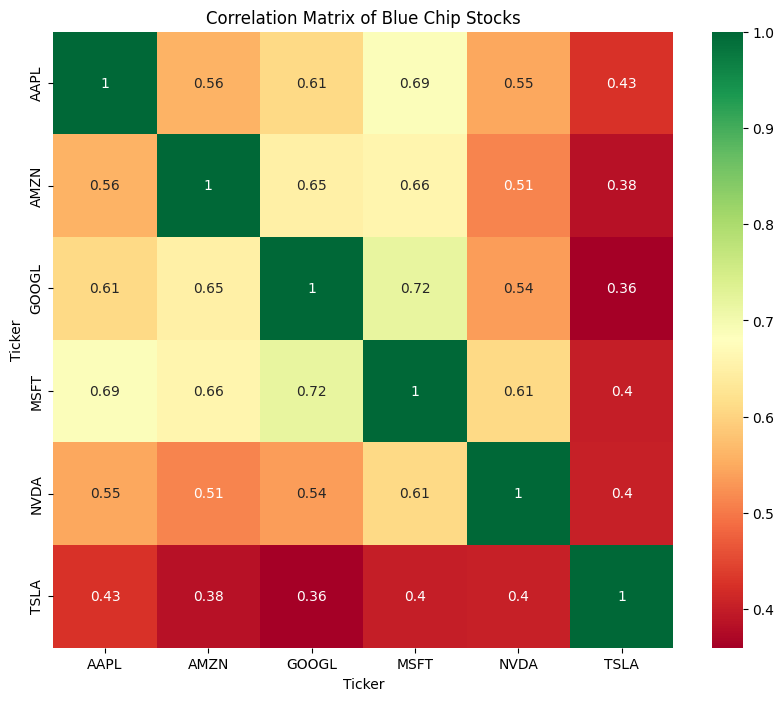

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

returns = data['Adj Close'].pct_change().dropna()
correlation_matrix = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix of Blue Chip Stocks')
plt.show()


In [16]:
window = 50  # 50-day window
for ticker in tickers:
    data[f'{ticker}_MA{window}'] = data['Adj Close'][ticker].rolling(window=window).mean()
    data[f'{ticker}_Volatility{window}'] = data['Adj Close'][ticker].pct_change().rolling(window=window).std()

# Trim initial NaNs
data_trimmed = data.dropna()

In [57]:
# Fetch historical stock price data
df = yf.download(tickers, start='2015-01-01', end='2024-07-21')

# Fetch earnings dates for each ticker
earnings_dates = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    earnings = stock.earnings_dates
    earnings_dates[ticker] = earnings.index
    print(f"{ticker} earnings dates:\n{earnings_dates[ticker]}\n")

[*********************100%%**********************]  6 of 6 completed


AAPL earnings dates:
DatetimeIndex(['2025-04-30 06:00:00-04:00', '2025-01-30 16:00:00-05:00',
               '2024-10-31 06:00:00-04:00', '2024-08-01 16:00:00-04:00',
               '2024-05-02 16:00:00-04:00', '2024-02-01 16:00:00-05:00',
               '2023-11-02 16:00:00-04:00', '2023-08-03 16:00:00-04:00',
               '2023-05-04 16:00:00-04:00', '2023-02-02 16:00:00-05:00',
               '2022-10-27 16:00:00-04:00', '2022-07-28 16:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Earnings Date', freq=None)

MSFT earnings dates:
DatetimeIndex(['2025-04-23 16:00:00-04:00', '2025-01-28 16:00:00-05:00',
               '2024-10-22 06:00:00-04:00', '2024-07-30 16:00:00-04:00',
               '2024-04-25 16:00:00-04:00', '2024-01-30 16:00:00-05:00',
               '2023-10-24 16:00:00-04:00', '2023-07-25 16:00:00-04:00',
               '2023-04-25 16:00:00-04:00', '2023-01-24 16:00:00-05:00',
               '2022-10-25 16:00:00-04:00', '2022-07-26 16:00:00

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Perform exponential smoothing and forecasting for each stock
forecast_data = {}
for ticker in tickers:
    # Fit the model with additive trend and seasonality
    model = ExponentialSmoothing(data_trimmed['Adj Close'][ticker], trend='add', seasonal='add', seasonal_periods=252)  # 252 trading days in a year
    model_fit = model.fit()
    
    # Forecast for one year (365 days)
    forecast = model_fit.forecast(steps=365)
    forecast_data[ticker] = forecast

    # Print model summary
    print(f"Model summary for {ticker}:\n{model_fit.summary()}\n")

# Display the forecast data for AAPL
print(forecast_data['AAPL'].head())



c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will res

Model summary for AAPL:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     AAPL   No. Observations:                 2347
Model:             ExponentialSmoothing   SSE                           7668.836
Optimized:                         True   AIC                           3290.911
Trend:                         Additive   BIC                           4765.700
Seasonal:                      Additive   AICC                          3354.917
Seasonal Periods:                   252   Date:                 Mon, 22 Jul 2024
Box-Cox:                          False   Time:                         17:43:38
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9783235                alpha                 Tru

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model summary for MSFT:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     MSFT   No. Observations:                 2347
Model:             ExponentialSmoothing   SSE                          24313.262
Optimized:                         True   AIC                           5999.014
Trend:                         Additive   BIC                           7473.802
Seasonal:                      Additive   AICC                          6063.020
Seasonal Periods:                   252   Date:                 Mon, 22 Jul 2024
Box-Cox:                          False   Time:                         17:43:41
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9035695                alpha                 Tru

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Model summary for GOOGL:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    GOOGL   No. Observations:                 2347
Model:             ExponentialSmoothing   SSE                           5568.938
Optimized:                         True   AIC                           2539.964
Trend:                         Additive   BIC                           4014.753
Seasonal:                      Additive   AICC                          2603.970
Seasonal Periods:                   252   Date:                 Mon, 22 Jul 2024
Box-Cox:                          False   Time:                         17:43:44
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9470463                alpha                 Tr

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Model summary for NVDA:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     NVDA   No. Observations:                 2347
Model:             ExponentialSmoothing   SSE                           1559.201
Optimized:                         True   AIC                           -447.840
Trend:                         Additive   BIC                           1026.949
Seasonal:                      Additive   AICC                          -383.834
Seasonal Periods:                   252   Date:                 Mon, 22 Jul 2024
Box-Cox:                          False   Time:                         17:43:47
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9443664                alpha                 Tru

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model summary for TSLA:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     TSLA   No. Observations:                 2347
Model:             ExponentialSmoothing   SSE                          71417.917
Optimized:                         True   AIC                           8527.969
Trend:                         Additive   BIC                          10002.758
Seasonal:                      Additive   AICC                          8591.975
Seasonal Periods:                   252   Date:                 Mon, 22 Jul 2024
Box-Cox:                          False   Time:                         17:43:49
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9780674                alpha                 Tru

c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rajan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


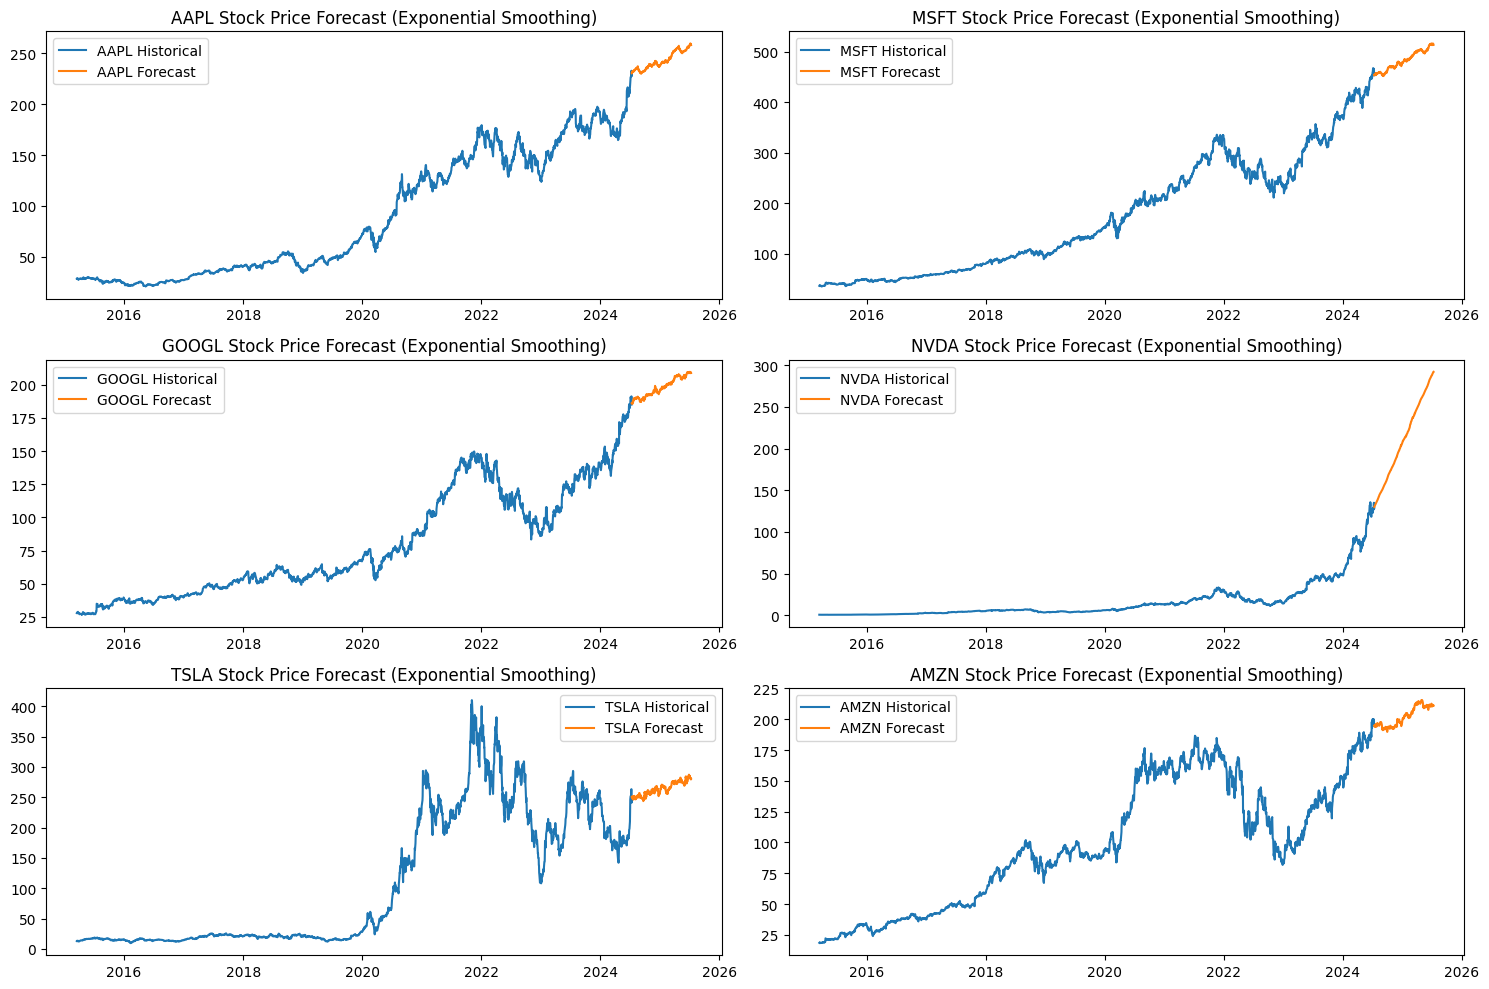

In [47]:
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    axes[i].plot(data_trimmed['Adj Close'][ticker], label=f'{ticker} Historical')
    axes[i].plot(pd.date_range(start=data_trimmed.index[-1], periods=365, freq='D'), forecast_data[ticker], label=f'{ticker} Forecast')
    axes[i].set_title(f'{ticker} Stock Price Forecast (Exponential Smoothing)')
    axes[i].legend()

plt.tight_layout()
plt.show()